In [73]:
from codebase import web_scrape_functions as wsf
from codebase import analysis_functions as af
from codebase import match_data
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import utils
from utils import logger
import os
import logging
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
logger.handlers[1].setLevel(logging.INFO)
pd.get_option("display.max_columns")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


20

In [74]:
PLAYER_ID = '253802'

In [75]:
test_match_list = wsf.player_match_list(PLAYER_ID, _format='test')
test_match_list

['489226',
 '489227',
 '489228',
 '535999',
 '518950',
 '518951',
 '518952',
 '518953',
 '565817',
 '565818',
 '565806',
 '565807',
 '565808',
 '565809',
 '598812',
 '598813',
 '598814',
 '598815',
 '676525',
 '676527',
 '648665',
 '648667',
 '667651',
 '667653',
 '667711',
 '667713',
 '667715',
 '667717',
 '667719',
 '754737',
 '754739',
 '754741',
 '754743',
 '870729',
 '895773',
 '895775',
 '895777',
 '903603',
 '903605',
 '903607',
 '903609',
 '1022593',
 '1022595',
 '1022597',
 '1022599',
 '1030213',
 '1030215',
 '1030217',
 '1034809',
 '1034811',
 '1034813',
 '1034815',
 '1034817',
 '1041761',
 '1062573',
 '1062574',
 '1062575',
 '1109602',
 '1109603',
 '1109604',
 '1122723',
 '1122724',
 '1122725',
 '1122276',
 '1122277',
 '1122278',
 '1119549',
 '1119550',
 '1119551',
 '1119552',
 '1119553',
 '1157752',
 '1157753',
 '1144993',
 '1144994',
 '1144995',
 '1144996',
 '1188628',
 '1188629',
 '1187007',
 '1187008',
 '1187009',
 '1187016',
 '1187017',
 '1187685',
 '1187686',
 '1223869

In [76]:
match_101 = match_data.MatchData(test_match_list[-1])

2022-06-01 23:24:23,951 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/match_jsons/1278683_match_jsons.json
2022-06-01 23:24:23,956 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/htmls/1278683_html.html
2022-06-01 23:24:24,129 - INFO - Match ID 1278683: Loading match comms
2022-06-01 23:24:24,130 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/full_comms/1278683_full_comms.json


In [77]:
match_101.__dict__.keys()

dict_keys(['match_id', 'match_url', 'json_url', 'json', 'html', 'comms_json', '__unicode__', 'status', 'match_class', 'season', 'description', 'legacy_scorecard_url', 'series', 'series_name', 'series_id', 'event_url', 'details_url', 'officials', 'current_summary', 'present_datetime_local', 'present_datetime_gmt', 'start_datetime_local', 'start_datetime_gmt', 'cancelled_match', 'rain_rule', 'date', 'continent', 'town_area', 'town_name', 'town_id', 'weather_location_code', 'match_title', 'result', 'ground_id', 'ground_name', 'lighting', 'followon', 'scheduled_overs', 'innings_list', 'innings', 'latest_batting', 'latest_bowling', 'latest_innings', 'latest_innings_fow', 'team_1', 'team_1_id', 'team_1_abbreviation', 'team_1_players', 'team_1_innings', 'team_1_run_rate', 'team_1_overs_batted', 'team_1_batting_result', 'team_2', 'team_2_id', 'team_2_abbreviation', 'team_2_players', 'team_2_innings', 'team_2_run_rate', 'team_2_overs_batted', 'team_2_batting_result', 'home_team', 'batting_first

In [78]:
match_101.legacy_scorecard_url

'https://static.espncricinfo.com/db/ARCHIVE/2021-22/AUS_IN_PAK/SCORECARDS/AUS_PAK_T2_12-16MAR2022'

In [79]:
match_101.team_1_players

[{'age_days': 24,
  'age_years': 31,
  'alpha_name': 'AGARWAL,MA',
  'batting_hand': 'right-hand batter',
  'batting_style': 'rhb',
  'batting_style_long': 'right-hand bat',
  'bowling_hand': 'right-arm bowler',
  'bowling_pacespin': 'spin bowler',
  'bowling_style': 'ob',
  'bowling_style_long': 'right-arm offbreak ',
  'captain': 0,
  'card_long': 'MA Agarwal',
  'card_qualifier': '',
  'card_short': 'Agarwal',
  'dob': '1991-02-16',
  'keeper': 0,
  'known_as': 'Mayank Agarwal',
  'mobile_name': 'Agarwal',
  'object_id': 398438,
  'player_id': '59599',
  'player_primary_role': 'batter',
  'player_style_id': 8,
  'player_type': 1,
  'player_type_name': 'player',
  'popular_name': 'Agarwal',
  'portrait_alt_id': '',
  'portrait_object_id': 1220573,
  'status_id': 3},
 {'age_days': 316,
  'age_years': 34,
  'alpha_name': 'SHARMA,RG',
  'batting_hand': 'right-hand batter',
  'batting_style': 'rhb',
  'batting_style_long': 'right-hand bat',
  'bowling_hand': 'right-arm bowler',
  'bowlin

In [80]:
match_101.date

'2022-03-12'

In [81]:
match_101_contr = af._get_player_contribution(PLAYER_ID, match_101, 'bat', True, True)
match_101_contr[-1]

2022-06-01 23:24:24,453 - INFO - Pre-transforming match commentary for 1278683
2022-06-01 23:24:24,470 - INFO - 1278683: Processing text commentary fields
2022-06-01 23:24:24,609 - INFO - 1278683: Processing bowler runs


,_uid,id,inningNumber,ballsActual,ballsUnique,oversUnique,oversActual,overNumber,ballNumber,totalRuns,...,commentPreTextItems,commentTextItems,commentPostTextItems,commentVideos,commentImages,events,over,batsmanName,bowlerName,bowlerRuns
755,37593106,37593106,3,None,None,30.03,30.3,31,3,0,...,Virat kohli is the new batter. india's lead is...,"Fuller around off, comes forward to defend. th...",None,None,[],[],None,V Kohli,DM de Silva,0
756,37593109,37593109,3,None,None,30.04,30.4,31,4,2,...,None,Length ball on middle and leg and spinning fur...,None,None,[],[],None,V Kohli,DM de Silva,2
757,37593110,37593110,3,None,None,30.05,30.5,31,5,0,...,None,"Slower through the air, fuller on the stumps. ...",None,None,[],[],None,V Kohli,DM de Silva,0
758,37593113,37593113,3,None,None,30.06,30.6,31,6,0,...,None,"Fuller length around off, stays back and defen...",None,None,[],[],"{'team': {'id': 6, 'objectId': 6, 'scribeId': ...",V Kohli,DM de Silva,0
762,37593135,37593135,3,None,None,31.04,31.4,32,4,2,...,None,"Fuller around off, comes forward to defend but...",None,None,[],[],None,V Kohli,P Jayawickrama,2
763,37593138,37593138,3,None,None,31.05,31.5,32,5,1,...,None,"Length ball around off, goes back and punches ...",None,None,[],[],None,V Kohli,P Jayawickrama,1
765,37593143,37593143,3,None,None,32.01,32.1,33,1,4,...,None,"Down the track, gets to the pitch of the ball ...",None,None,[],[],None,V Kohli,DM de Silva,4
766,37593147,37593147,3,None,None,32.02,32.2,33,2,1,...,None,"Length outside off, goes back and cuts it towa...",None,None,[],[],None,V Kohli,DM de Silva,1
773,37593189,37593189,3,None,None,33.03,33.3,34,3,0,...,None,"Fuller around off, comes forward and defends i...",None,None,[],[],None,V Kohli,P Jayawickrama,0
774,37593191,37593191,3,None,None,33.04,33.4,34,4,1,...,None,"Short of length outside off, goes back and cut...",None,None,[],[],None,V Kohli,P Jayawickrama,1


We now have the ability to get the match list for a particular player. We now need to just get the comms from this match, and also get the individual player stats for the match. 

#### Comms for each match

In [82]:
# all_comms = []

# for m_id in test_match_list:
#     try:
#         logger.info(f'Grabbing data for matchID {m_id}')
#         _match = match_data.MatchData(m_id, serialize=False)
#         comms = af.pre_transform_comms(_match)
#         comm_w_labels = af.create_labels(comms, ['isWicket', 'isFour', 'isSix'], null_category='noEvent')
#         all_comms.append(comm_w_labels)
#     except utils.NoMatchCommentaryError:
#         continue

# try:
#     all_comms = pd.concat(all_comms, ignore_index=True)
#     print(all_comms.size)
#     print(all_comms.groupby('labels').size())
#     all_comms.to_csv('./commentary_labels.csv')
# except ValueError:
#     print('No commentary to show')

Lets get the player scores for every match, we will run the player contribution function for each match in the list.  

In [83]:
contributions = []
for match_id in test_match_list:
    match = match_data.MatchData(match_id)
    contribution = af._cricket_totals(PLAYER_ID, match, _type='bat', by_innings=True, is_object_id=True)
    for i,inning in enumerate(contribution['bat']):
        contributions.append({**inning, **{key:contribution[key] for key in contribution.keys() if key not in ['bat', 'bowl']}, **{'inning': i}})

contributions[-5:]

2022-06-01 23:24:24,784 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/match_jsons/489226_match_jsons.json
2022-06-01 23:24:24,787 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/htmls/489226_html.html
2022-06-01 23:24:24,922 - INFO - Match ID 489226: Loading match comms
2022-06-01 23:24:24,923 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/full_comms/489226_full_comms.json
2022-06-01 23:24:24,979 - INFO - Pre-transforming match commentary for 489226
2022-06-01 23:24:24,995 - INFO - 489226: Processing text commentary fields
2022-06-01 23:24:25,257 - INFO - 489226: Processing bowler runs
2022-06-01 23:24:25,293 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/match_jsons/489227_match_jsons.json
2022-06-01 23:24:25,296 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/htmls/489227_html.html
2

[{'inning': 0,
  'runs': 79,
  'balls_faced': 201,
  'fours': 12,
  'six': 1,
  'dot_balls': 163,
  'not_out': False,
  'date': datetime.datetime(2022, 1, 11, 0, 0),
  'team': '6',
  'opposition': '3',
  'ground': '174',
  'continent': 'Africa'},
 {'inning': 1,
  'runs': 29,
  'balls_faced': 143,
  'fours': 4,
  'six': 0,
  'dot_balls': 127,
  'not_out': False,
  'date': datetime.datetime(2022, 1, 11, 0, 0),
  'team': '6',
  'opposition': '3',
  'ground': '174',
  'continent': 'Africa'},
 {'inning': 0,
  'runs': 45,
  'balls_faced': 76,
  'fours': 5,
  'six': 0,
  'dot_balls': 49,
  'not_out': False,
  'date': datetime.datetime(2022, 3, 4, 0, 0),
  'team': '6',
  'opposition': '8',
  'ground': '1015',
  'continent': 'Asia'},
 {'inning': 0,
  'runs': 23,
  'balls_faced': 48,
  'fours': 2,
  'six': 0,
  'dot_balls': 35,
  'not_out': False,
  'date': datetime.datetime(2022, 3, 12, 0, 0),
  'team': '6',
  'opposition': '8',
  'ground': '683',
  'continent': 'Asia'},
 {'inning': 1,
  'runs'

In [84]:
#innings = [inning for match in contributions for inning in match]
#innings[:5]

In [85]:
innings_df = pd.DataFrame(contributions)
innings_df.head()
innings_df.shape

(171, 12)

Now we will try to graph the running average on this graph. 

In [86]:
%%script false --no-raise-error
running_average = []

total_runs = 0
out = 0

for i,innings in enumerate(zip(innings_df.runs, innings_df.not_out)):
    total_runs += innings[0]
    if innings[1] == False:
        out += 1
    try:
        running_average.append(round(total_runs/out,2))
    except ZeroDivisionError:
        running_average.append(None)

running_average

We now can map the average of the last X innings, this is the 'form guide'

In [87]:
%%script false --no-raise-error
last_x_average = []

window_runs = 0
window_out = 0

#moving window of length x

window_size = 12

for i,innings in enumerate(zip(innings_df.runs, innings_df.not_out)):
    if i>=window_size:
        window_runs -= innings_df.runs.iloc[i-window_size]
        if innings_df.not_out.iloc[i-window_size] == False:
            window_out -= 1
    
    window_runs += innings[0]
    if innings[1] == False:
        window_out += 1
    try:
        last_x_average.append(round(window_runs/window_out,2))
    except ZeroDivisionError:
        last_x_average.append(None)

last_x_average

In [88]:
%%script false --no-raise-error
y_range = [0, max(innings_df.runs) + 20]

fig, ax1 = plt.subplots(figsize=(18,10))
#sns.set_theme()
sns.lineplot(data = {'Average': running_average, f'Last {window_size} Innings': last_x_average}, sort = False, ax=ax1, palette='rocket')

ax1.set_ylim(y_range)

ax2 = ax1.twinx()

sns.barplot(data = innings_df, x=innings_df.index, y=innings_df.runs, alpha=0.5, ax=ax2, hue=innings_df.continent, palette='mako', dodge=False)
ax2.set_ylim(y_range)

In [89]:
%%script false --no-raise-error
SPD_SMITH_ID = 267192
SPD_SMITH_TEST_MATCHES = wsf.player_match_list(SPD_SMITH_ID)
spd_smith_contributions = af.get_cricket_totals(SPD_SMITH_ID, SPD_SMITH_TEST_MATCHES, 'bat', True, True)

In [90]:
%%script false --no-raise-error
# spd_smith_contributions[-5:]

In [91]:
%%script false --no-raise-error
spd_innings = pd.DataFrame(spd_smith_contributions)
spd_innings.tail()

In [92]:
%%script false --no-raise-error
spd_ave = af.get_running_average(SPD_SMITH_ID)
spd_recent_form = af.get_recent_form_average(SPD_SMITH_ID, window_size=12)

In [93]:
%%script false --no-raise-error
y_range = [0, max(spd_innings.runs) + 20]

fig, ax1 = plt.subplots(figsize=(18,10))
#sns.set_theme()
sns.lineplot(data = {'Average': spd_ave, f'Last {window_size} Innings': spd_recent_form}, sort = False, ax=ax1, palette='rocket')

ax1.set_ylim(y_range)

ax2 = ax1.twinx()

sns.barplot(data = innings_df, x=spd_innings.index, y=spd_innings.runs, alpha=0.5, ax=ax2, hue=spd_innings.continent, palette='mako', dodge=False)
ax2.set_ylim(y_range)

In [94]:
%%script false --no-raise-error
contributions = af.get_player_contributions(PLAYER_ID, test_match_list, 'bat', False, True)

In [95]:
%%script false --no-raise-error
contributions[-5:]

In [96]:
%%script false --no-raise-error
innings = af.get_cricket_totals(PLAYER_ID, test_match_list, 'bat', True, True)
innings[-5:]

In [97]:
#Williamson
#af.get_career_batting_graph(277906)

In [98]:
#Root
#af.get_career_batting_graph(303669)

2022-06-01 23:25:16,410 - INFO - Getting match list for player, 267192
2022-06-01 23:25:19,116 - INFO - Getting player contributions for 267192
2022-06-01 23:25:19,118 - INFO - Getting player controbutions for match 426394
2022-06-01 23:25:19,119 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/match_jsons/426394_match_jsons.json
2022-06-01 23:25:19,122 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/htmls/426394_html.html
2022-06-01 23:25:19,253 - INFO - Match ID 426394: Loading match comms
2022-06-01 23:25:19,254 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/full_comms/426394_full_comms.json
2022-06-01 23:25:19,313 - INFO - Pre-transforming match commentary for 426394
2022-06-01 23:25:19,365 - INFO - 426394: Processing text commentary fields
2022-06-01 23:25:19,596 - INFO - 426394: Processing bowler runs
2022-06-01 23:25:19,612 - INFO - Getting player controbutions

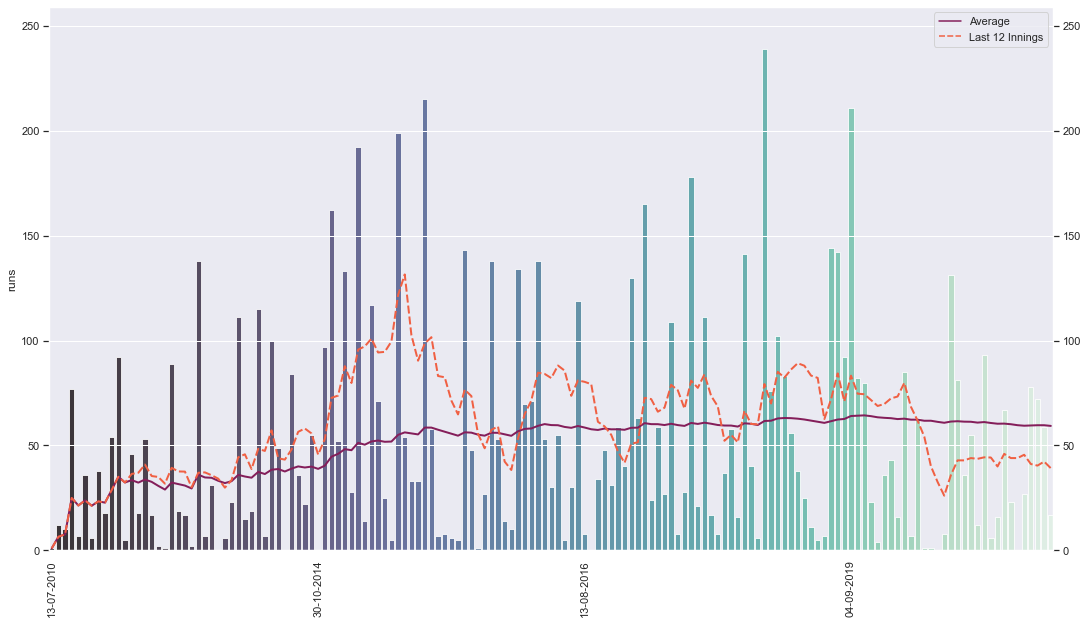

In [99]:
#Smith
af.get_career_batting_graph(SPD_SMITH_ID)

2022-06-01 23:26:03,051 - INFO - Getting match list for player, 253802
2022-06-01 23:26:05,408 - INFO - Getting player contributions for 253802
2022-06-01 23:26:05,409 - INFO - Getting player controbutions for match 1041761
2022-06-01 23:26:05,410 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/match_jsons/1041761_match_jsons.json
2022-06-01 23:26:05,412 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/htmls/1041761_html.html
2022-06-01 23:26:05,525 - INFO - Match ID 1041761: Loading match comms
2022-06-01 23:26:05,526 - INFO - Loading data from /Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/full_comms/1041761_full_comms.json
2022-06-01 23:26:05,570 - INFO - Pre-transforming match commentary for 1041761
2022-06-01 23:26:05,587 - INFO - 1041761: Processing text commentary fields
2022-06-01 23:26:06,066 - INFO - 1041761: Processing bowler runs
2022-06-01 23:26:06,091 - INFO - Getting player contr

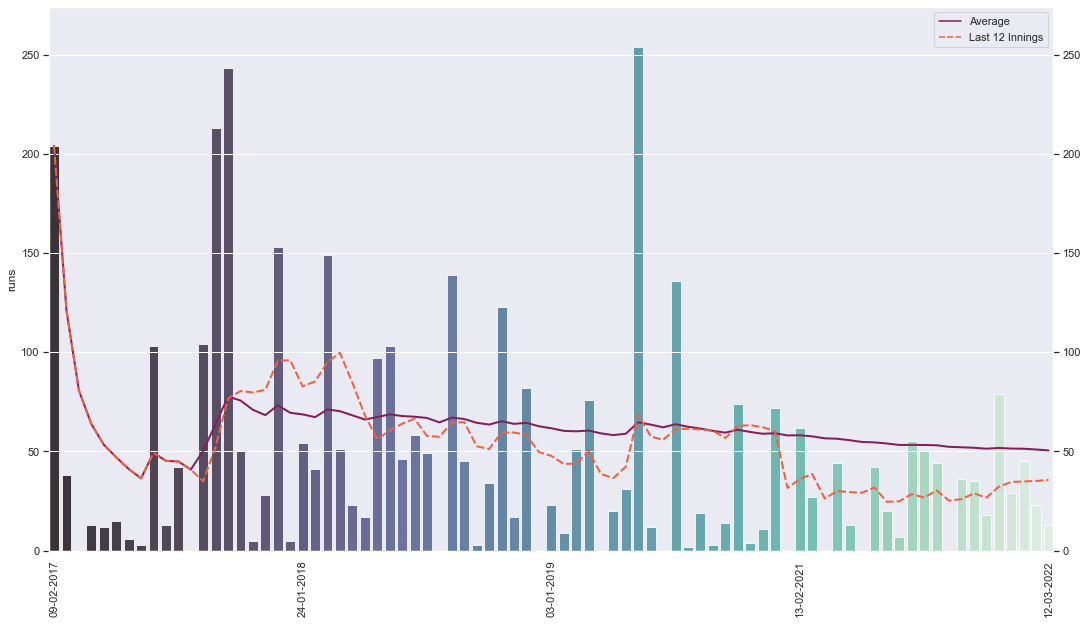

In [100]:
#Kohli
af.get_career_batting_graph(PLAYER_ID, dates='2017-01-01:')

In [101]:
#Cook
#af.get_career_batting_graph(11728)

In [102]:
sns.set_theme()
innings_df.head()

,inning,runs,balls_faced,fours,six,dot_balls,not_out,date,team,opposition,ground,continent
0,0,4,10,1,0,9,False,2011-06-20,6,4,200,Americas
1,1,15,54,2,0,43,False,2011-06-20,6,4,200,Americas
2,0,0,2,0,0,2,False,2011-06-28,6,4,199,Americas
3,1,27,107,1,1,87,False,2011-06-28,6,4,199,Americas
4,0,30,53,2,0,35,False,2011-07-06,6,4,629,Americas


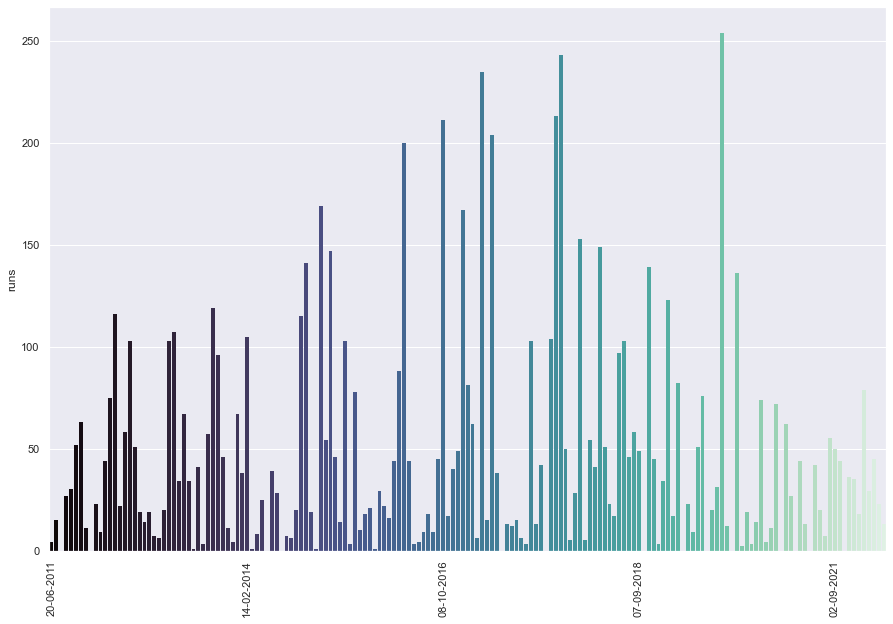

In [103]:
fig_dims = (15,10)
fig,ax = plt.subplots(figsize=fig_dims);
bar = sns.barplot(innings_df.index, innings_df.runs, palette='mako');
x_dates = innings_df.date.dt.strftime('%d-%m-%Y')
bar.set_xticklabels(labels=x_dates, rotation=90);

_ = plt.setp(ax.patches, linewidth=0)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [104]:
top_players = wsf.read_statsguru('https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=batting_average;qualmin1=30;qualval1=matches;template=results;type=batting', table_name='Overall figures')


In [105]:
top_players = pd.DataFrame(top_players[0])

In [106]:
top_players.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,11
0,"(DG Bradman (AUS), /ci/content/player/4188.html)",1928-1948,52,80,10,6996,334,99.94,29,13,7,"(, javascript:void(0))"
1,"(H Sutcliffe (ENG), /ci/content/player/20413.h...",1924-1935,54,84,9,4555,194,60.73,16,23,2,"(, javascript:void(0))"
2,"(SPD Smith (AUS), /ci/content/player/267192.html)",2010-2022,85,151,17,8010,239,59.77,27,36,6,"(, javascript:void(0))"
3,"(KF Barrington (ENG), /ci/content/player/9014....",1955-1968,82,131,15,6806,256,58.67,20,35,5,"(, javascript:void(0))"
4,"(ED Weekes (WI), /ci/content/player/53241.html)",1948-1958,48,81,5,4455,207,58.61,15,19,6,"(, javascript:void(0))"


In [107]:
top_players.Player = [wsf.player_id_from_link(player, playername=False)[1] for player in top_players.Player]

In [108]:
top_players.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,11
0,4188,1928-1948,52,80,10,6996,334,99.94,29,13,7,"(, javascript:void(0))"
1,20413,1924-1935,54,84,9,4555,194,60.73,16,23,2,"(, javascript:void(0))"
2,267192,2010-2022,85,151,17,8010,239,59.77,27,36,6,"(, javascript:void(0))"
3,9014,1955-1968,82,131,15,6806,256,58.67,20,35,5,"(, javascript:void(0))"
4,53241,1948-1958,48,81,5,4455,207,58.61,15,19,6,"(, javascript:void(0))"


In [109]:
match_list = []
for player in top_players.Player:
    match_list += wsf.player_match_list(player)

In [110]:
set([int(id) for id in match_list])

{1122310,
 1024041,
 1024043,
 434256,
 434257,
 860263,
 860265,
 860267,
 516212,
 516213,
 516214,
 226351,
 63561,
 63185,
 1152848,
 63186,
 213347,
 63187,
 63188,
 63580,
 63581,
 352661,
 352662,
 352663,
 352664,
 63582,
 426394,
 426395,
 1122723,
 1122724,
 1122725,
 426415,
 426416,
 565806,
 565807,
 582192,
 582193,
 565808,
 565809,
 565817,
 565818,
 238167,
 238168,
 361050,
 361051,
 238171,
 238172,
 238180,
 238181,
 238182,
 238186,
 238187,
 238201,
 238202,
 238203,
 238205,
 238206,
 238207,
 238216,
 238217,
 221840,
 63635,
 63636,
 1278674,
 1278675,
 1278682,
 1278683,
 63656,
 1188628,
 1188629,
 598812,
 598813,
 598814,
 598815,
 213856,
 730089,
 730091,
 218383,
 214009,
 754737,
 754739,
 754741,
 754743,
 730277,
 730279,
 730281,
 730295,
 730297,
 63752,
 63753,
 63756,
 1041761,
 1000851,
 1000853,
 1000855,
 722329,
 722331,
 722333,
 239025,
 1000881,
 1000883,
 1000885,
 386496,
 648665,
 648667,
 648673,
 648675,
 648677,
 902635,
 902637,
 902

In [111]:
len(match_list)

4892

In [112]:
import os

for match in match_list:
    if os.path.exists(f"/Users/abhiramjoshi/Documents/Personal/cricket_analysis/data/match_jsons/{match}_match_jsons.json"):
        logger.info("Skipping as match %s already exists", match)
        continue
    match_data.MatchData(match_id=match)

2022-06-01 23:28:43,303 - INFO - Skipping as match 62562 already exists
2022-06-01 23:28:43,304 - INFO - Skipping as match 62564 already exists
2022-06-01 23:28:43,305 - INFO - Skipping as match 62565 already exists
2022-06-01 23:28:43,306 - INFO - Skipping as match 62566 already exists
2022-06-01 23:28:43,307 - INFO - Skipping as match 62580 already exists
2022-06-01 23:28:43,307 - INFO - Skipping as match 62581 already exists
2022-06-01 23:28:43,308 - INFO - Skipping as match 62582 already exists
2022-06-01 23:28:43,309 - INFO - Skipping as match 62583 already exists
2022-06-01 23:28:43,310 - INFO - Skipping as match 62584 already exists
2022-06-01 23:28:43,311 - INFO - Skipping as match 62585 already exists
2022-06-01 23:28:43,311 - INFO - Skipping as match 62586 already exists
2022-06-01 23:28:43,312 - INFO - Skipping as match 62587 already exists
2022-06-01 23:28:43,314 - INFO - Skipping as match 62588 already exists
2022-06-01 23:28:43,315 - INFO - Skipping as match 62589 already

KeyboardInterrupt: 

In [ ]:
for player in top_players.Player:
    player_match_list = wsf.player_match_list(player)
    player_innings_df = af.get_cricket_totals(player, player_match_list, _type='bat', by_innings=True, is_object_id=True, from_scorecards=True)
    af.calculate_recent_form_average(player_innings_df)